In [15]:
import pandas as pd
import pandas_profiling
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.stattools import adfuller
from numpy import log
%matplotlib inline
from matplotlib import pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

In [8]:
# load data into dataframe
df = pd.read_csv('FluNetInteractiveReport.csv')
df.columns.tolist()

['Country',
 'WHOREGION',
 'FLUREGION',
 'Year',
 'Week',
 'SDATE',
 'EDATE',
 'SPEC_RECEIVED_NB',
 'SPEC_PROCESSED_NB',
 'AH1',
 'AH1N12009',
 'AH3',
 'AH5',
 'ANOTSUBTYPED',
 'INF_A',
 'BYAMAGATA',
 'BVICTORIA',
 'BNOTDETERMINED',
 'INF_B',
 'ALL_INF',
 'ALL_INF2',
 'TITLE']

In [5]:
df.head()

,Country,WHOREGION,FLUREGION,Year,Week,SDATE,EDATE,SPEC_RECEIVED_NB,SPEC_PROCESSED_NB,AH1,...,AH5,ANOTSUBTYPED,INF_A,BYAMAGATA,BVICTORIA,BNOTDETERMINED,INF_B,ALL_INF,ALL_INF2,TITLE
0,United States of America,Region of the Americas of WHO,North America,2016,1,1/4/2016,1/10/2016,21627,21627,0.0,...,NaN,398,698,52,12,198,262,960,20667,No Report
1,United States of America,Region of the Americas of WHO,North America,2016,2,1/11/2016,1/17/2016,20437,20437,0.0,...,NaN,576,921,60,23,271,354,1275,19162,No Report
2,United States of America,Region of the Americas of WHO,North America,2016,3,1/18/2016,1/24/2016,20744,20744,0.0,...,NaN,729,1190,83,25,360,468,1658,19086,No Report
3,United States of America,Region of the Americas of WHO,North America,2016,4,1/25/2016,1/31/2016,23359,23359,0.0,...,NaN,1050,1736,104,28,509,641,2377,20982,No Report
4,United States of America,Region of the Americas of WHO,North America,2016,5,2/1/2016,2/7/2016,24988,24988,0.0,...,NaN,1585,2428,143,62,685,890,3318,21670,No Report


In [6]:
# Profile
profile = df.profile_report(title = "Flu Dataset")
profile.to_notebook_iframe()

# Number of specimes columns: Received/Coll, Processed
# Number of influenza A viruses detected by subtype: A(H1), A (H1N1) pdm09, A (H3), A (H5), A (not subtyped), A (total)
# Number of influenza B viruses detected by subtype: B (Yamagata), B (victoria), B (lineage not determined), B (total)
# Total number of influenza positive
# Total number of influenza negative
# ILI activity

In [28]:
plt.rcParams.update({'figure.figsize':(15,10), 'figure.dpi':120})

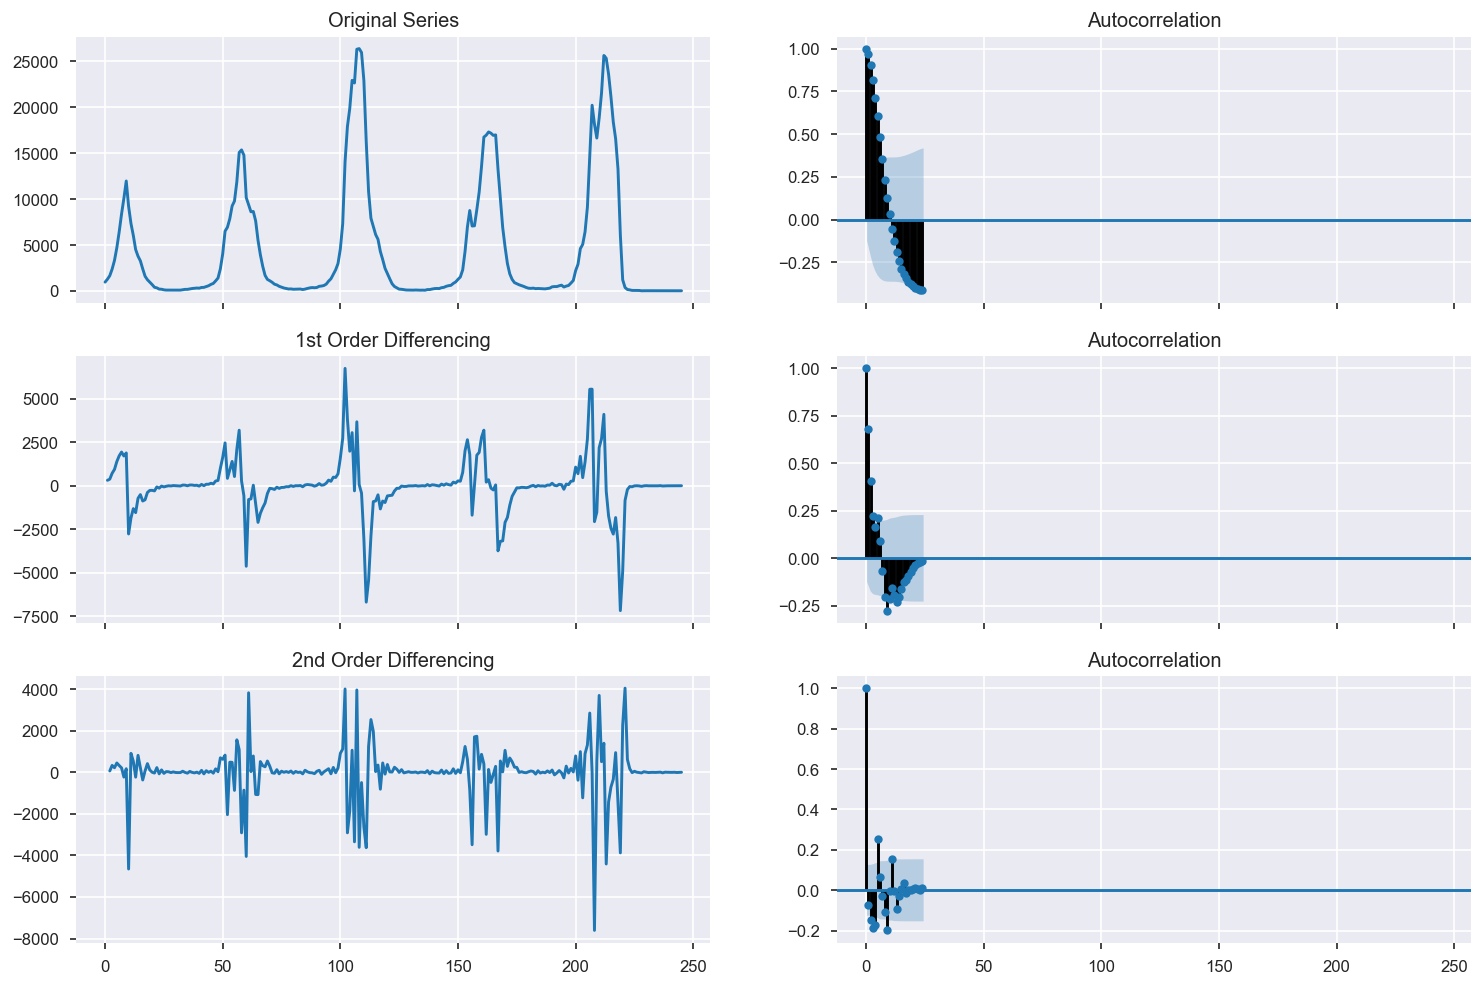

In [29]:
# Original Series
fig, axes = plt.subplots(3, 2, sharex=True)
axes[0, 0].plot(df['ALL_INF']); axes[0, 0].set_title('Original Series')
plot_acf(df['ALL_INF'], ax=axes[0, 1])

# 1st Differencing
axes[1, 0].plot(df['ALL_INF'].diff()); axes[1, 0].set_title('1st Order Differencing')
plot_acf(df['ALL_INF'].diff().dropna(), ax=axes[1, 1])

# 2nd Differencing
axes[2, 0].plot(df['ALL_INF'].diff().diff()); axes[2, 0].set_title('2nd Order Differencing')
plot_acf(df['ALL_INF'].diff().diff().dropna(), ax=axes[2, 1])

plt.show()